In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [5]:
# clustering me y ka values use nhi krte so we will ignore it 
x.shape

(1000, 2)

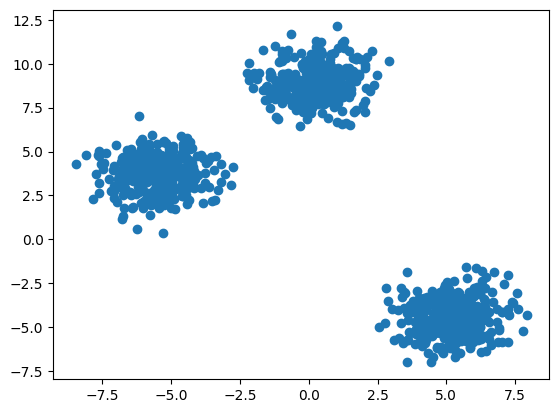

In [6]:
plt.scatter(x[:,0], x[:,1])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.33, random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [11]:
#mannual method 
# Elbow method

wcss=[]
for k in range (1,11):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Pyth

In [12]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 992.0866512884329,
 853.6002278169216,
 754.7724717524122,
 667.9953101416904,
 577.5102020873584,
 531.2772418983621]

Text(0, 0.5, 'Wcss')

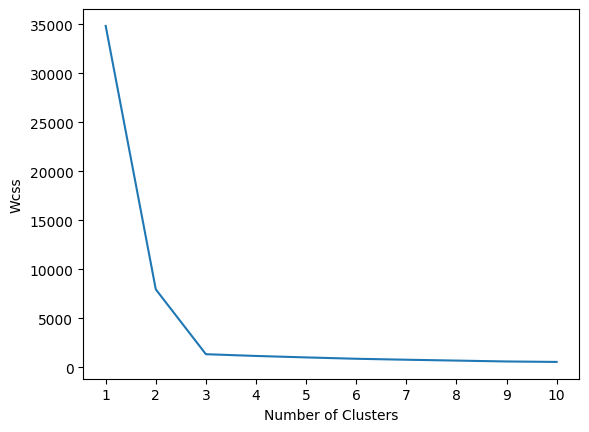

In [13]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")

In [14]:
kmeans= KMeans(n_clusters=3,init="k-means++")


In [16]:
y_labels=kmeans.fit_predict(x_train)

C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


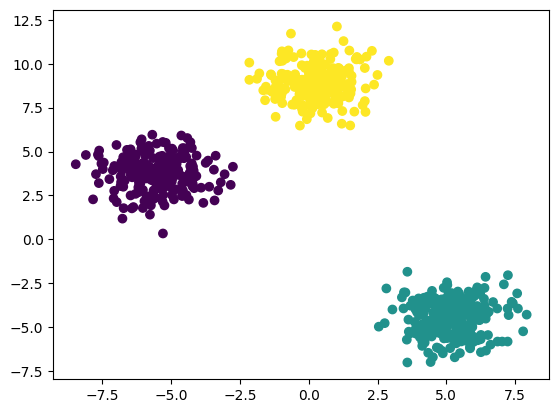

In [18]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_labels)

In [19]:
#for test data
y_test_labels=kmeans.fit_predict(x_test)

C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


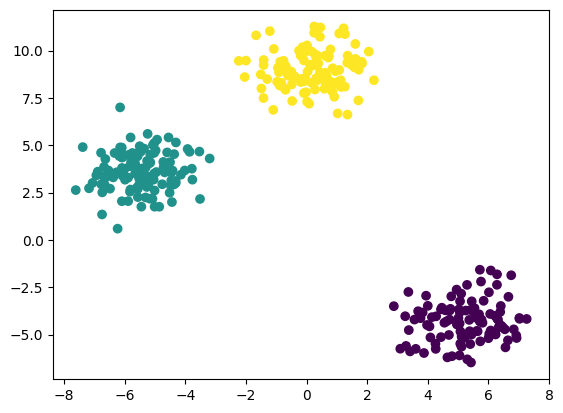

In [20]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_labels)

In [21]:
#Knee locator 
!pip install kneed


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from kneed import KneeLocator

In [27]:
kl= KneeLocator(range(1,11),wcss,  curve="convex", direction="decreasing")
kl.elbow

3

In [36]:
# for performance Score use Silhoutte score

from sklearn.metrics import silhouette_score

In [37]:
silhouette_coefficients=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravinder Kumar\AppData\Local\Programs\Python\Pyth

In [38]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48196009682399193,
 0.3368477282812841,
 0.3476495620089599,
 0.3406782190699398,
 0.3447768804514772,
 0.3420320977253968]

Text(0, 0.5, 'silhouetee Coefficient')

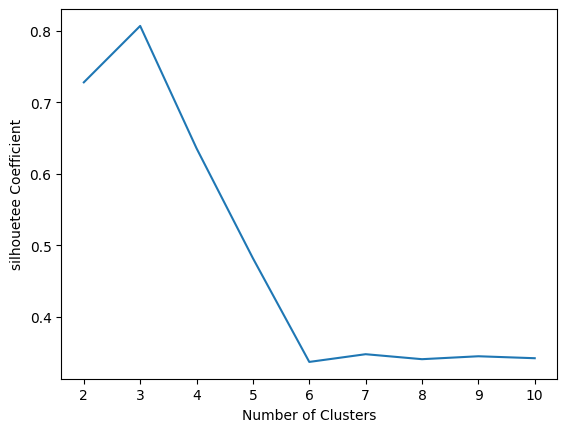

In [39]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouetee Coefficient")